# 02 Computational Representations of Biomedical Shapes

## A) Shapes of Landmarks

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE

<center><img src="figs/01_optic_nerves.png" width=600px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>


# Outline of ECE 594n

- Unit 1 (Geometry): Differential Geometry for Engineers
- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
- Unit 3 (Machine Learning): Geometric Machine Learning for Shapes

<center><img src="figs/hero_brain_mris_3360x960_417KB.jpg" width=1400px alt="default"/></center>

Examples taken from cutting-edge research in the **biomedical field**.

# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - **A) Shapes of landmarks**
    - Motivation: Shape of Glaucoma
    - Practice: Procrustes Analysis and Group Actions
    - Theory: Kendall Shape Spaces
    - Application: Innovation in Pelvis Surgery
  - B) Shapes of curves
  - C) Shapes of surfaces
  - D) Deformations

# Motivation: Shape of Glaucoma



$\color{#EF5645}{\text{Question}}$: Find shape markers of glaucoma that could lead to automatic diagnosis?

Data - Patrangenaru and Ellingson (2015):
- 22 3D images of monkeys’ eyes (11 monkeys):
  - one eye normal without glaucoma.
  - one eye with glaucoma.
  

<center><img src="figs/01_optic_nerves.png" width=500px alt="default"/></center>
<center>Optic nerve heads without and with glaucoma.</center>

$\rightarrow$ On each 3D image, 5 anatomical "landmarks" are recorded.


$\color{#EF5645}{\text{Definition}}$: _Anatomical landmarks_ are defined as biologically meaningful loci that can be unambiguously defined and repeatedly located with a high degree of accuracy and precision.

$\color{#047C91}{\text{Example}}$: In the glaucoma dataset:
- 1st landmark: superior aspect of the retina,
- 2nd landmark: side of the retina closest to the temporal bone of the skull,
- 3rd landmark: nose side of the retina,
- 4th landmark: inferior point,
- 5th landmark: optical nerve head deepest point.

Let's see how anatomical landmarks are represented in the computer.

$\color{#EF5645}{\text{Definition}}$: A set $X$ of $k$ landmarks in $m$ dimensions can be described by an element in $\mathbb{R}^{k \times m}$, i.e., by a matrix of $k$ rows and $m$ columns.

$\color{#047C91}{\text{Example}}$: Consider the dataset of optical nerves. What is the number of landmarks $k$? What is the dimension $m$?

In [2]:
import geomstats.datasets.utils as data_utils

nerves, labels, monkeys = data_utils.load_optical_nerves()
print(nerves.shape)

(22, 5, 3)


### From Landmarks to Shapes of Landmarks

$\color{#EF5645}{\text{Definition}}$: Two sets $X_0$ and $X_1$ of $k$ landmarks are said to _have the same shape_ if one set can be obtained by translating, rotating, or re-scaling the other.

$\rightarrow$ We do not want to do machine learning on the _objects_ $X$'s directly, because: 
- translations/rotations/scalings do not contain the biological information.

$\rightarrow$ Instead, we want to do machine learning on the _shapes of the objects_ $X$'s.

# Practice: 

# Procrustes Analysis and Group Actions

### Procrustes in the Greek Mythology

Procrustes was a robber who killed his victims in a most cruel and unusual way. 

He made them lie on an iron bed and would force them to fit the bed:
- by cutting off the parts that hung off the ends, or 
- by stretching those people who were too short.

<center><img src="figs/02_greek.png" width=500px alt="default"/></center>

### Procrustes in Geometric Learning

$\color{#EF5645}{\text{Definition}}$: _Procrustes Analysis_ is a general method to perform machine learning on shapes of objects defined by sets of landmarks $X_0, ..., X_n$.

1. Superimpose objects $X_0, ..., X_n$: translate, rotate, possibly scale.

$\rightarrow$ Introduce "group actions".


<center><img src="figs/02_procrustes.png" width=900px alt="default"/></center>

2. Perform machine learning on superimposed objects (shapes).



### Group Actions

Consider the space of $k$ landmarks in $m$ dimensions: $\mathbb{R}^{k\times m}$.

$\color{#EF5645}{\text{Definition}}$: A _group action_ of a (Lie) group of transformations $G$ on $\mathbb{R}^{k \times m}$ is a function $*: G \times \mathbb{R}^{k \times m} \rightarrow \mathbb{R}^{k \times m}$, such that:
$$\forall g, h \in G, \forall X \in \mathbb{R}^{k \times m}, \quad g *(h * X)=(g h) * X,$$
$$\forall X \in \mathbb{R}^{k \times m}, \quad e *X=X.$$

$\color{#047C91}{\text{Example}}$: We will see how these groups can act on $\mathbb{R}^{k\times m}$:
  - the group of translations $\mathbb{R}^m$, 
  - the group of rotations $SO(m)$,
  - or the group of scalings $\mathbb{R}_+^*$.


### Action of translations on $\mathbb{R}^{k \times m}$

$\color{#EF5645}{\text{Definition}}$: Translating one set of $k$ landmarks $X=\begin{bmatrix} x_1 \\ ... \\ x_k \end{bmatrix}$ by a translation of vector $t \in \mathbb{R}^m$ is performed through the operation:
$$t * X = \begin{bmatrix} x_1 + t\\ ... \\ x_k + t \end{bmatrix}.$$
This defines an action of the group of translations $\mathbb{R}^m$ on the space $\mathbb{R}^{k \times m}$.

$\color{#EF5645}{\text{Definition}}$: Denote $x_l$ the $l$-th landmark of a set of landmarks $X$.
- The _barycenter $\bar X$_ of a set of landmarks is $\bar X = \frac{1}{k} \sum_{l=1}^k x_l$. 

$\color{#EF5645}{\text{Definition}}$: We say that a set of landmarks is centered if its barycenter is at $0$.

$\color{#047C91}{\text{Example}}$: We can use the action of translations to center a set $X$ of landmarks: we translate it by minus the coordinates of its barycenter.

In [3]:
import numpy as np

one_nerve = nerves[0]; print("One nerve:\n", one_nerve);
barycenter = np.mean(one_nerve, axis=0);
translated = one_nerve - barycenter
print("Translated nerve:\n", translated)
print("Barycenter of translated nerve:\n")
print(np.mean(translated, axis=0))

One nerve:
 [[2580.   1060.     60.31]
 [1360.   2660.    -78.4 ]
 [3800.   2660.   -132.68]
 [2580.   4260.    126.65]
 [2180.   2820.   -542.77]]
Translated nerve:
 [[   80.    -1632.      173.688]
 [-1140.      -32.       34.978]
 [ 1300.      -32.      -19.302]
 [   80.     1568.      240.028]
 [ -320.      128.     -429.392]]
Barycenter of translated nerve:

[0. 0. 0.]


### Action of scalings on $\mathbb{R}^{k \times m}$

$\color{#EF5645}{\text{Definition}}$: Scaling a centered set of $k$ landmarks $X=\begin{bmatrix} x_1 \\ ... \\ x_k \end{bmatrix}$ by a factor $\alpha \in \mathbb{R}^*_+$ is performed through the operation:
$$\alpha X = \begin{bmatrix} \alpha x_1 \\ ... \\ \alpha x_k\end{bmatrix}.$$

This defines an action of the group of scalings $\mathbb{R}_+^*$ on the space $\mathbb{R}^{k \times m}$.|

$\color{#EF5645}{\text{Definition}}$: Denote $x_l$ the $l$-th landmark of a _centered_ set of landmarks $X$.
- The _size $s$_ of a *centered* set of landmarks is $s = \sqrt{\sum_{l=1}^k ||x_l||^2}$. 


$\color{#047C91}{\text{Example}}$: We can use the action of scalings to rescale a set $X$ of landmarks to size 1: we rescale it by the inverse of its size.

In [5]:
import numpy as np

size = np.sqrt(np.sum(translated**2)); print("Original size", size)
rescaled = 1 / size * translated;
print("Size after rescaling:", np.sqrt(np.sum(rescaled**2)))

Original size 2918.738508239476
Size after rescaling: 1.0


### Action of rotations on $\mathbb{R}^{k \times m}$

$\color{#EF5645}{\text{Definition}}$: Rotating a centered set of $k$ landmarks $X=\begin{bmatrix} x_1 \\ ... \\ x_k \end{bmatrix}$ by a rotation with matrix $R \in SO(m)$ is performed through the operation:
$$R \ast X = \begin{bmatrix} x_1.R^T \\ ... \\ x_k.R^T \end{bmatrix},$$
where $T$ denotes the transpose.

This defines an action of the group of rotations $SO(m)$ on the space $\mathbb{R}^{k \times m}$.

In [12]:
import math as m
import numpy as np

theta = np.pi / 6
rotation = np.array([[ m.cos(theta), -m.sin(theta), 0 ],
                     [ m.sin(theta), m.cos(theta) , 0 ],
                     [ 0           , 0            , 1 ]])

rotated = rescaled @ rotation.T

In [18]:
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

label_to_str = {0: "Rescaled", 1: "Rotated"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}

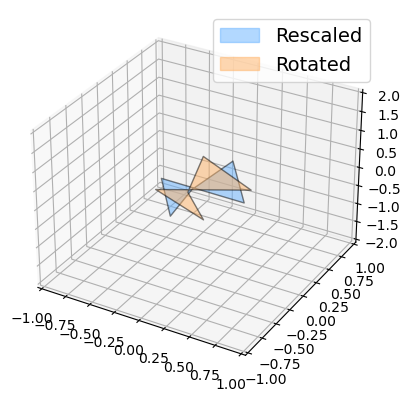

In [19]:
fig = plt.figure(); ax = fig.add_subplot(111, projection="3d"); 
ax.set_xlim((-1,1)); ax.set_ylim((-1, 1)); ax.set_zlim((-2, 2))

for label, nerve in enumerate([rescaled, rotated]):
    x = nerve[:, 0]; y = nerve[:, 1]; z = nerve[:, 2]
    verts = [list(zip(x, y, z))]

    poly = Poly3DCollection(verts, alpha=0.5)
    color = label_to_color[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5); patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 14}); plt.show()

### Procrustes in Geometric Learning (Continued)

$\color{#EF5645}{\text{Definition}}$: _Procrustes Analysis_ is a general method to perform machine learning on shapes of objects defined by sets of landmarks $X_0, ..., X_n$.

1. Superimpose objects $X_0, ..., X_n$: translate, rotate, possibly scale.  


<center><img src="figs/02_procrustes.png" width=900px alt="default"/></center>

2. Perform machine learning on superimposed objects (shapes).

### 1. Superimpose objects $X_0, ..., X_n$: translate, rotate, possibly scale.


$\color{#EF5645}{\text{Theory}}$: Fix a $X_0$. For each $i=1, ..., n$: 
- Find $g_i \in G$, such that: $g_i = \text{argmin}_{g \in G} ||X_0 - g \ast X_i||^2,$ where:
  - $G$ represents the group of rotations, translations, and/or scalings.
  - $g \ast X$ represents the "action" of g on the landmark set $X$.
- Use this $g_i$ to superimpose $X_i$ onto $X_0$ by computing $g_i \ast X_i$.

$\color{#EF5645}{\text{Practice}}$:
- $\color{#EF5645}{\text{Translations/Scalings}}$: Superimposing with translations and scalings amounts to...

..._project_ the $X$'s in a "pre-shape space".
  - $X$ is translated such that its barycenter is at 0.
  - $X$ is scaled such that its size is 1.

- $\color{#EF5645}{\text{Rotations}}$: Superimposing with rotations amounts to...

..._align_ the preshapes and send them into a "shape space" also called: Kendall shape space.

$\rightarrow$ Use the methods `projection` and `align` of the manifold `PreShapeSpace`.

In [25]:
from geomstats.geometry.pre_shape import PreShapeSpace

m_ambient = 3; k_landmarks = 5
preshape = PreShapeSpace(m_ambient=m_ambient, k_landmarks=k_landmarks)

nerves_preshape = preshape.projection(nerves)
 #print("Check that the sets are centered:\n", np.mean(nerves_preshape, axis=1))
# print("Check that the sets have size 1:\n", np.linalg.norm(nerves_preshape, axis=(1,2)))

print(preshape.belongs(nerves_preshape))

base_nerve = nerves_preshape[0]

nerves_shape = preshape.align(
    point=nerves_preshape, base_point=base_nerve)
print(nerves_shape.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
(22, 5, 3)


### 2. Perform machine learning on superimposed objects (shapes).

= amounts to perform machine learning in the _Kendall shape space_.

The Kendall shape space is a manifold equipped with a Riemannian metric called the Kendall shape metric.

$\rightarrow$ We use this metric to run machine learning algorithms (see Unit 3).

$\color{#EF5645}{\text{Remark}}$: The Kendall shape metric re-orients (superimpose) the objects before performing its computations.

In [15]:
from geomstats.geometry.pre_shape import KendallShapeMetric

kendall_metric = KendallShapeMetric(
    m_ambient=m_ambient, k_landmarks=k_landmarks)

<center><img src="figs/01_triangles_2d.png" width=600px alt="default"/></center>

# Theory: Kendall Shape Spaces

### Mysteries of Procrustes Analysis

We need theory to address the following questions:
- Why do we need to use the Kendall Metric?
- Why does Step 1 send the object data into a (curved) manifold?


$\rightarrow$ Understanding geometry provides answers.

<center><img src="figs/02_procrustes.png" width=600px alt="default"/></center>

### Group Action and Their Orbits

$\color{#EF5645}{\text{Definition}}$: The _orbit_ of a set of landmarks $X \in \mathbb{R}^{k \times m}$ under the action of the group $G$ as: 
$$O_X = G * X=\{g * X \mid g \in G\}.$$

$\color{#EF5645}{\text{Explanation}}$: The orbit of the object $X$ represents all objects with the same shape as $X$.

$\color{#047C91}{\text{Example}}$: Consider sets of 2 landmarks in 2D under the action of $SO(2)$. The orbit of one set $x$ of two landmarks is a circle. 

<center><img src="figs/02_2landmarks.png" width=300px alt="default"/></center>

### (Kendall) Shape Spaces

$\color{#EF5645}{\text{Definition}}$: The _Kendall shape space_ is defined as the space of orbits of $\mathbb{R}^{k \times m } \setminus 0$ under the action of $\mathbb{R}^m$, $SO(m)$ and $\mathbb{R}_+^*$.



$\color{#047C91}{\text{Example}}$: What is the shape space in the example of the 2 landmarks with the action of $SO(2)$?


<center><img src="figs/02_2landmarks.png" width=500px alt="default"/></center>


### Example: Kendall Shape Spaces of Triangles in 2D

Schematic proof explaining why the space of triangular shapes is a sphere:

- Triangle objects are described by elements $X$'s in $\mathbb{R}^{3 \times 2}$.
- Centering removes 2 degrees of freedom: elements in $\mathbb{R}^{2 \times 2} = \mathbb{R}^4$.
- Forcing the scale to be 1: elements on a 3D hypersphere in $\mathbb{R}^4$.
- We draw its orbits by $SO(2)$ and remove them: elements on a 2D sphere.

<center><img src="figs/02_orbits_sphere.png" width=400px alt="default"/></center>
<center>Schematic illustration of the orbits of $SO(2)$ on the 3D hypersphere, represented as orbits of $SO(2)$ on the 2D sphere for convenience.</center>

<center><img src="figs/01_triangles_2d.png" width=900px alt="default"/></center>

## Application: Innovation in Pelvis Surgery

### Severe Pelvis Injuries


Severe pelvic injuries include "open book" dislocations:
- often come from a motor vehicle collision or fall from a significant height.
- have a high mortality rate of 10.4%:

$\rightarrow$ complications often occur at surgery and during infections after surgery.

<center><img src="figs/02_openbook.jpeg" width=400px alt="default"/></center>

### Goal: Surgical Planning of Pelvis Fracture Reduction

<center><img src="figs/02_pelvis.png" width=900px alt="default"/></center>

$\color{#EF5645}{\text{Questions}}$:
- Can we speed-up the surgery process by analyzing shape of pelvis & required internal fixations (bars, screws)?
- Can we design an internal surgery that would reduce risks of infection?



### Data: CT scans from 100 patients

Data acquired with a CT scan (2014):
- 100 patients: 52 males, 48 females and diversity of ages.
- 100 3D images of pelvis
  
$\rightarrow$ On each 3D image, 16 anatomical "landmarks" were recorded.

<center><img src="figs/02_pelvis_landmarks.png" width=900px alt="default"/></center>

### Method: Apply Procrustes Analysis (no scaling)



**1. Superimpose:**
  - via translation: Center the 16 landmarks.
  - via rotation: Align the 16 landmarks
 
<center><img src="figs/02_pelvis_superimpose.png" width=600px alt="default"/></center>


$\color{#EF5645}{\text{Remark}}$: We do want to take into account the scaling, as the size of the patient is important to decide which fixations to put in.

 
**2. Perform machine learning**
- **[principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)** (PCA, see Unit 03)

$\rightarrow$ we should get several types of fixations: small/large size and small/large width, using the values given by the PCA.

<center><img src="figs/02_pelvis_pca.png" width=1000px alt="default"/></center>




# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - **A) Shapes of landmarks**
    - Motivation: Shape of Glaucoma
    - Practice: Procrustes Analysis and Group Actions
    - Theory: Kendall Shape Spaces
    - Application: Innovation in Pelvis Surgery
  - B) Shapes of curves
  - C) Shapes of surfaces
  - D) Deformations